* データマイニング特別演習 演習テーマ３ - yolov8による物体検出の環境構築 -

1. google colaboratory のノートブックを開き、ランタイムのハードウェアアクセラレータをGPUに変更
2. Googleドライブに作業用フォルダを作成して、そこに作業環境を移動
3. 公式サイトからプログラムを入手 (gitコマンドでクローンする)
4. プログラムが利用するライブラリをインストール
5. サンプル画像で動作を確認

* 参考情報
  * 【物体検出2023】YOLOv8まとめ① YOLOv8を試してみる
  〜導入からデモまで〜<br>https://tt-tsukumochi.com/archives/6275
  * YOLOv8による物体検知の結果を表示してみる<br>
  https://www.hinomaruc.com/displaying-results-of-object-detection-with-yolov8/

In [ ]:
# 2. ノートブックからGoogleドライブのマイドライブにアクセスできるように設定
from google.colab import drive
drive.mount('/content/drive')
%cd ./drive/MyDrive

# マイドライブに作業用フォルダを作成し、そこに作業環境を移動 (作業フォルダ名を表示)
!mkdir -p sudspg
%cd sudspg

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/MyDrive/sudspg


In [ ]:
# 3. 公式サイトからプログラムを入手 (gitコマンドでクローンする)
!git clone https://github.com/ultralytics/ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [ ]:
# 4. プログラムが利用するライブラリをインストール
%cd ultralytics
! pip install -r requirements.txt

/content/drive/MyDrive/sudspg/ultralytics


In [ ]:
# 5. サンプル画像で動作を確認
# 5.1 作業フォルダに学習済みモデルをダウンロード
from ultralytics import YOLO
model = YOLO("yolov8l.pt")

In [ ]:
# 5.2 画像から物体を検出 (source画像の物体検出結果を (project)/(name) フォルダに保存)
_project = 'runs/detect'
_name = 'predict'
result = model.predict(source='https://ultralytics.com/images/bus.jpg',
                       project=_project,
                       name=_name,
                       exist_ok=True,
                       save=True,
                       save_txt=True)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/drive/MyDrive/sudspg/ultralytics/bus.jpg: 640x480 5 persons, 1 bicycle, 1 bus, 73.8ms
Speed: 4.2ms preprocess, 73.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


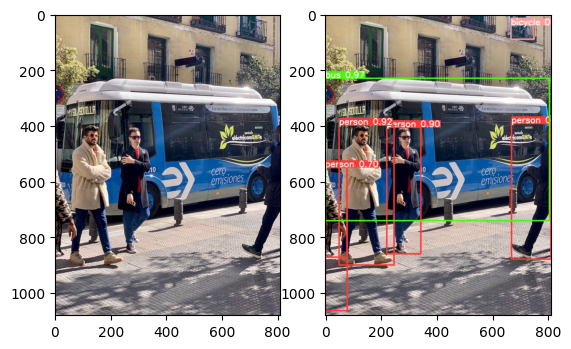

In [ ]:
# 5.3 物体検出結果の画像を表示
import os
import matplotlib.pyplot as plt
import cv2

_basename = os.path.basename(result[0].path)
_save_path = result[0].save_dir
original_img = cv2.cvtColor(cv2.imread(_basename), cv2.COLOR_BGR2RGB)
result_img = cv2.cvtColor(cv2.imread(os.path.join(_save_path, _basename)), cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.subplot(1, 2, 2)
plt.imshow(result_img)

In [ ]:
# 5.4 テキストファイルに出力された物体検出結果を表示
!cat runs/detect/predict/labels/bus.txt

5 0.497163 0.450178 0.991549 0.473472
0 0.912411 0.588875 0.174132 0.451535
0 0.184022 0.601428 0.243265 0.465473
0 0.349349 0.58622 0.15066 0.420316
0 0.0485465 0.658769 0.096554 0.297614
0 0.0491605 0.747356 0.0977329 0.475961
1 0.873033 0.0488618 0.100996 0.069176
